# SVM

- 복잡한 분류 문제에 적합  

- 선형/비선형  

- 대표적인 이진 분류 모델  

- 왜 인기?  
    - 분류를 할 때 가장 최적의 선을 찾아줌(두 데이터와 선의 거리까지 고려)

- vector 선으로 분류


### 선형
- 라지 마진 분류
    - 직선으로 경계가 나눌 수 있는가?
    - 특성이 2개
    - 결정 경계가 샘플에 가까우면 안된다.
    
- 하드 마진 분류
    - 이상치(선형 분류가 되지만, 하나(이상치)가 반대쪽 영역에 가있음)에 민감하다
    - 데이터가 선형으로 분류되어야 한다.
    
- 소프트 마진 분류
    - 하드 마진 분류에 비해 이상치에 덜민감(유연한 모델)
    - 'C'(하이프파라미터)를 이용하여 균형을 조정한다.


### 비선형
##### 선형은 특성이 2개였지만, 비선형은 특성을 추가하여서 선형 구분 데이터셋을 만든다.



### 결론
overfitting 등의 문제가 생길 수 있다고 함. 아직 함수 하나하나를 이해하지는 못했음. 육안으로 봤을 때에는 PCA를 통해 차원 축소를 한 이후에 해야한다고 생각함.하지만 실제로 정확도가 더 높게 나왔다.



# 추가적으로 확인해봐야할것(다음시간에..)

- SVM으로 이진분류를 할 때 정확도가 높게 나왔다.
- LinearSVC함수에서 iter, random state의 역할은?
- 만약에 데이터가 5000개인데 iter를 더 큰 수(10000,100000)으로 돌려도 되는가?
- RMSE 수준에 따라 정확도가 어느정도인지?
- overfitting등의 문제에 대해 더 찾아보자
- 특성들을 조합하여 더 높은 수치가 나오는 것들 찾아보기

In [2]:
!pip install xgboost

    100% |████████████████████████████████| 114.0MB 249kB/s eta 0:00:01
typing-extensions 3.7.4.1 has requirement typing>=3.7.4; python_version < "3.5", but you'll have typing 3.6.4 which is incompatible.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.5MB 15.9MB/s ta 0:00:01
typing-extensions 3.7.4.1 has requirement typing>=3.7.4; python_version < "3.5", but you'll have typing 3.6.4 which is incompatible.
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [4]:
# Data manipulation
import numpy as np
import pandas as pd

# Data pre-processing
from sklearn.preprocessing import StandardScaler as ss

# Dimensionality reduction
from sklearn.decomposition import PCA

#  Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling modules
from xgboost.sklearn import XGBClassifier

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

In [6]:
data=pd.read_csv("./data/binary_winequalityN.csv")
#dataw=pd.read_csv("./data/1_white.csv")
#datar=pd.read_csv("./data/1_red.csv")

data=data.dropna(axis=0)  ##없애버림, 평균값 넣으려면 axis=0대신에 inplate=True 사용
#dataw=dataw.dropna(axis=0)

print "wine 데이터셋의 크기:" ,data.shape
print "\nwine 데이터셋의 키:", data.keys()

wine 데이터셋의 크기: (6463, 14)

wine 데이터셋의 키: Index([u'type', u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'binaryQuality'],
      dtype='object')


데이터셋의 키
['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 14 columns):
type                    6463 non-null object
fixed acidity           6463 non-null float64
volatile acidity        6463 non-null float64
citric acid             6463 non-null float64
residual sugar          6463 non-null float64
chlorides               6463 non-null float64
free sulfur dioxide     6463 non-null float64
total sulfur dioxide    6463 non-null float64
density                 6463 non-null float64
pH                      6463 non-null float64
sulphates               6463 non-null float64
alcohol                 6463 non-null float64
quality                 6463 non-null int64
binaryQuality           6463 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 757.4+ KB


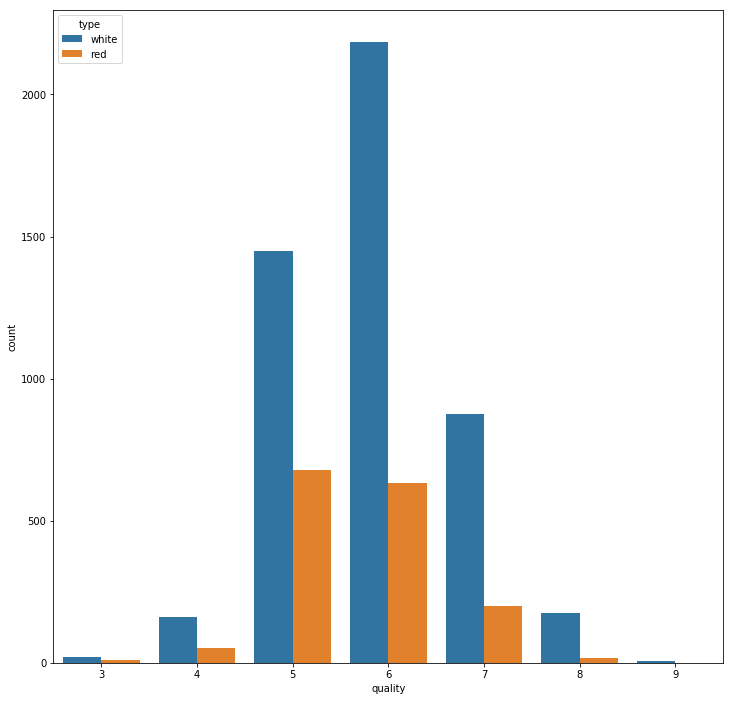

In [8]:
plt.figure(figsize=(12, 12))
sns.countplot(x = 'quality', data=data, hue='type')

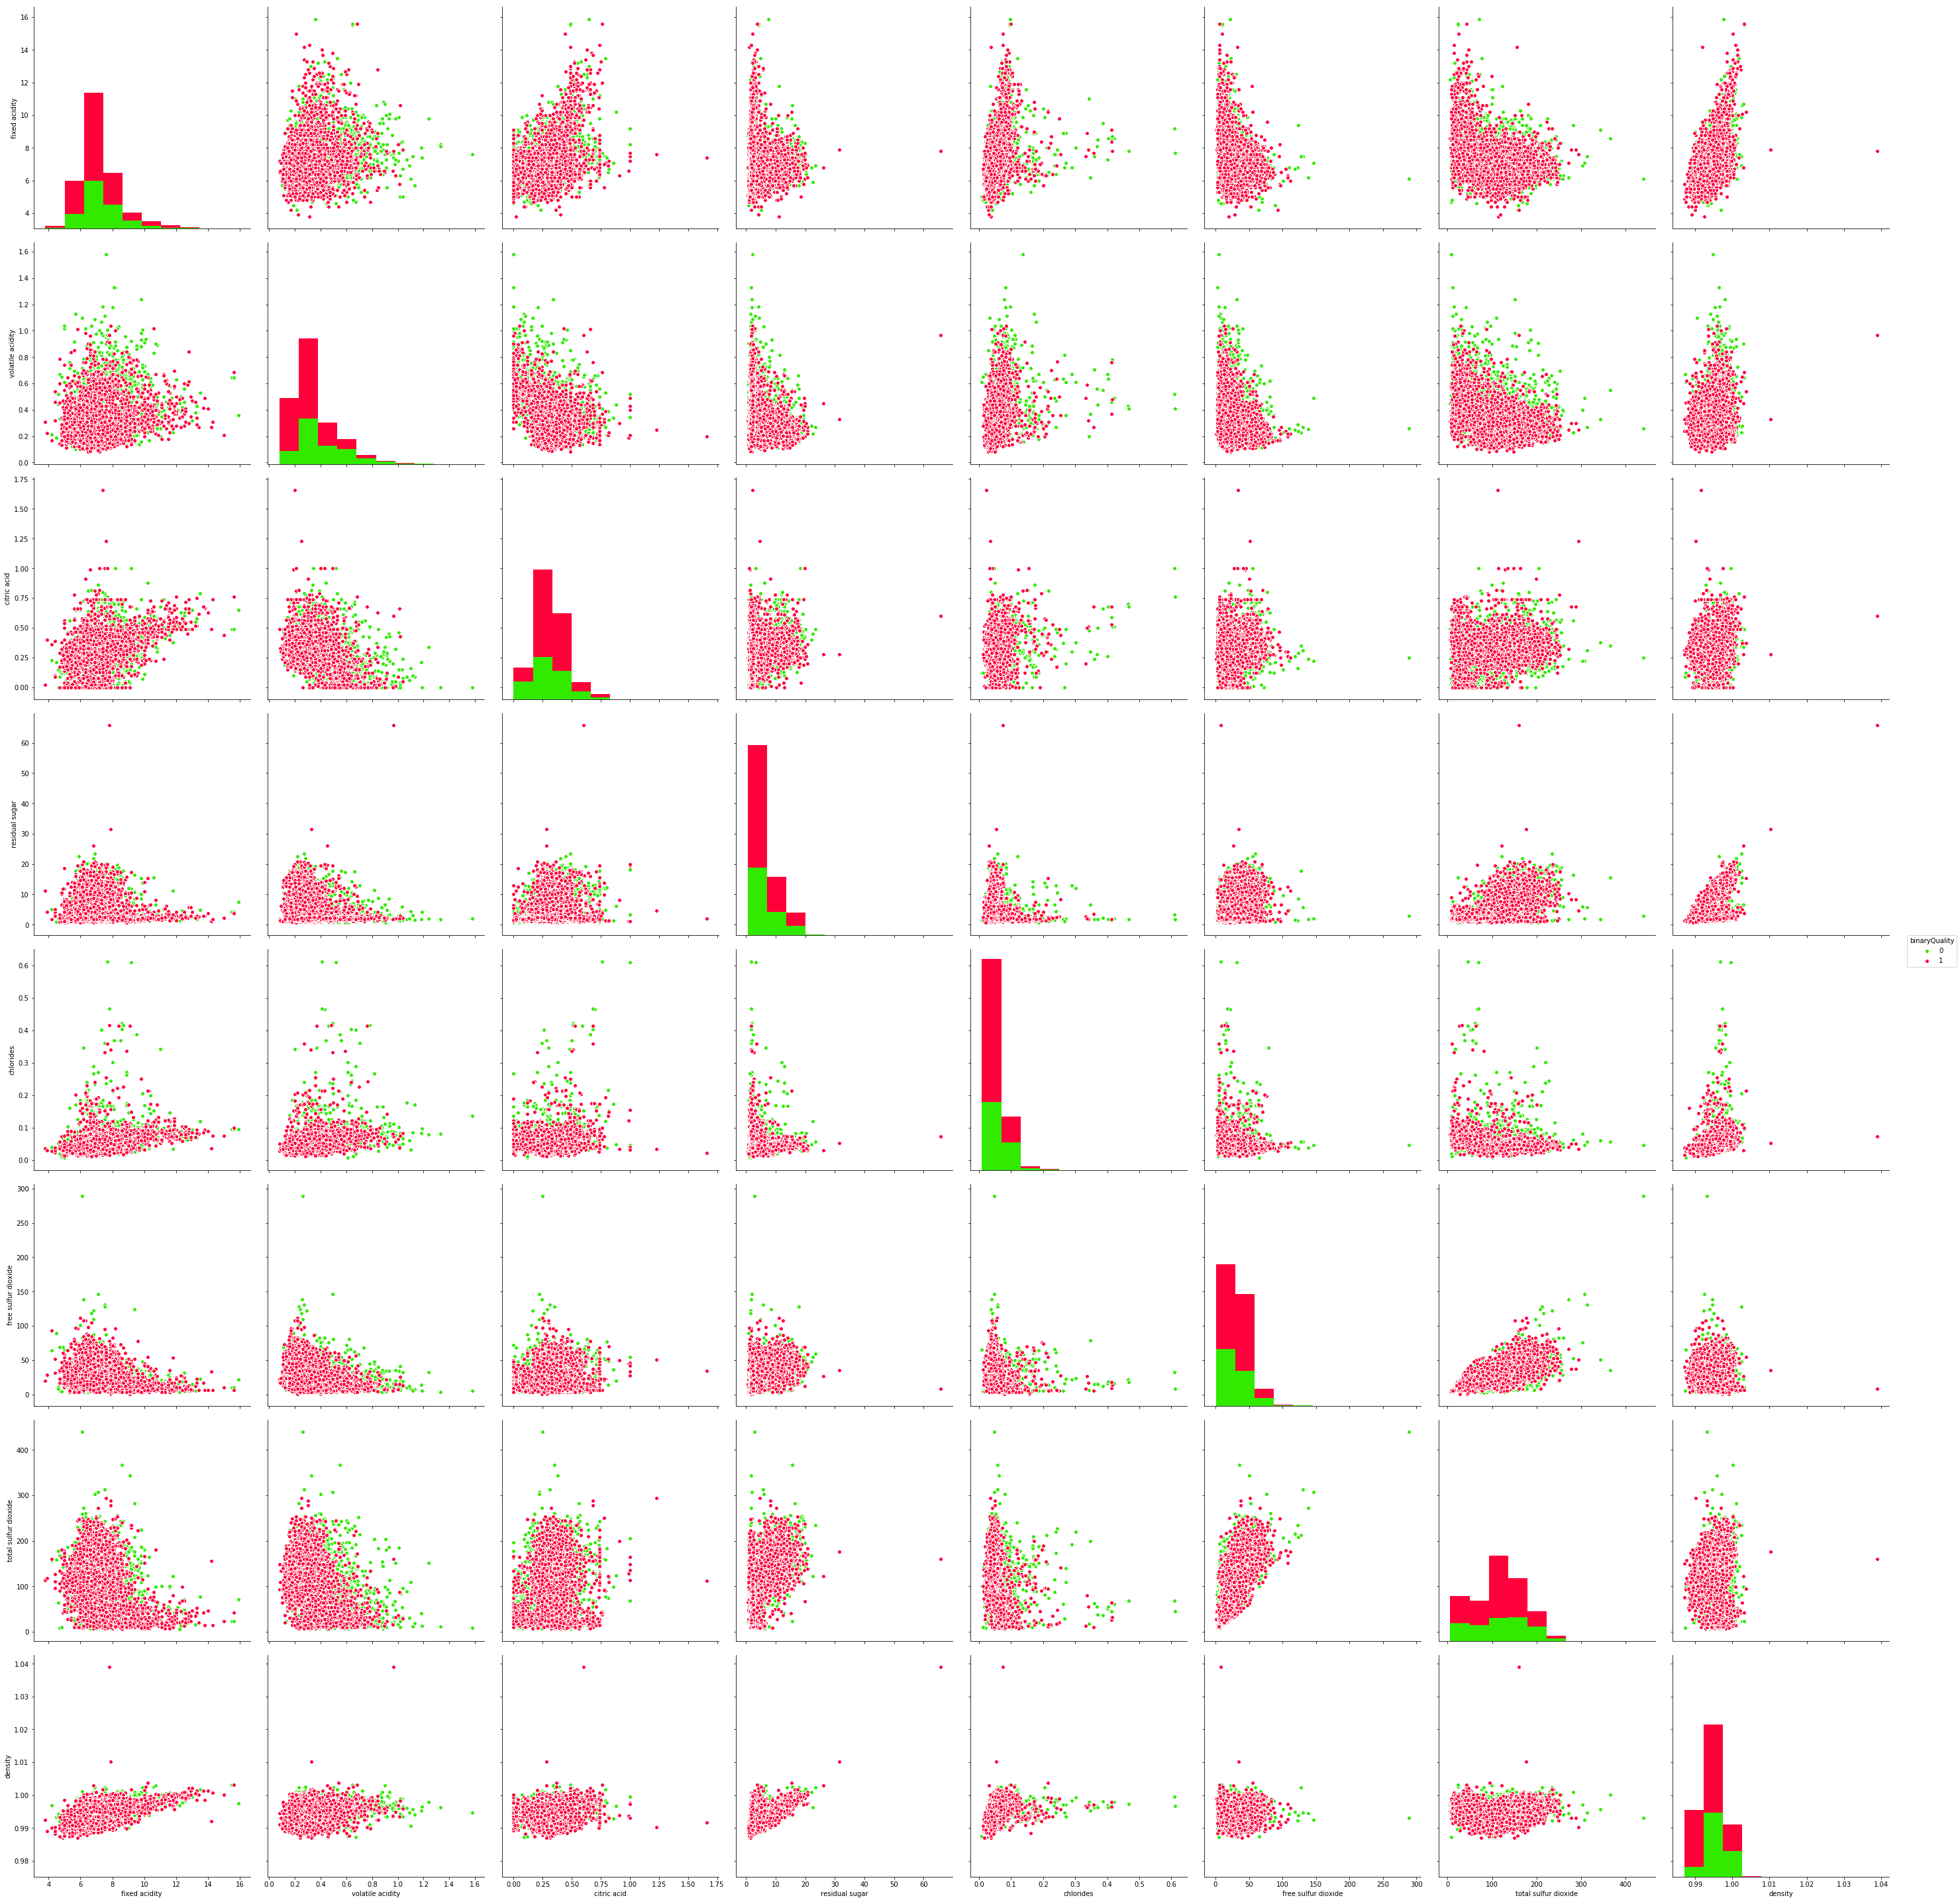

In [9]:
#red+white

sns.pairplot(data, vars = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density'], hue='binaryQuality', size = 5, palette="prism")

# 훈련 데이터와 테스트 데이터

In [10]:
#x_train에 적재하기 위한 2차원 배열의 특성 dataset을 만든다.
#6463*11(?) 사이즈

#실험의 편의성을 위해 data마다 이름을 붙였다.
f1=data['fixed acidity']
f2=data['volatile acidity']
f3=data['citric acid']
f4=data['residual sugar']
f5=data['chlorides']
f6=data['free sulfur dioxide']
f7=data['total sulfur dioxide']
f8=data['density']
f9=data['pH']
f10=data['sulphates']
f11=data['alcohol']


c_data=np.c_[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(c_data, data['binaryQuality'],random_state=0)

print "X_train 크기: ", X_train.shape #(#(numbe) of data*75%, # of features)
print "y_train 크기: ", y_train.shape #x트레인 데이터에 대한 정답
print "X_test 크기: ", X_test.shape
print "y_test 크기: ", y_test.shape

X_train 크기:  (4847, 11)
y_train 크기:  (4847,)
X_test 크기:  (1616, 11)
y_test 크기:  (1616,)


## SVM

---

In [119]:
from sklearn.svm import SVC, LinearSVC

## SVM 분류기

In [120]:
from sklearn.svm import LinearSVR
lin_clf = LinearSVC(max_iter=10000, random_state=42)
lin_clf.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

#### 훈련 set에 대한 예측을 만들어 정확도를 측정

In [121]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)
##quality로 했을 때: 0.5188776562822365

0.6981638126676295

#### data의 scale 조정

In [122]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [123]:
lin_clf = LinearSVC(max_iter=10000, random_state=42)
lin_clf.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [124]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)
##quality로 했을 때: 0.5289870022694451

0.7404580152671756

미세하게 개선됨을 확인

#### RBF 커널 적용

In [125]:
svm_clf = SVC(gamma='auto', decision_function_shape="ovr")
svm_clf.fit(X_train_scaled[:4847], y_train[:4847]) ##4847개 data로 모델 훈련

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [126]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)
##quality로 했을 때: 0.6075923251495771

0.796162574788529

정확도가 개선됨

#### 교차 검증 이용한 랜덤 서치로 hyper parameter 튜닝

test 위해 1000개만 해봄

In [127]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, cv=3, n_iter=10, verbose=2, n_jobs=-1)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7feb713eb610>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7feb71318110>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [128]:
rnd_search_cv.best_estimator_

SVC(C=7.034461814381863, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.014158929735878978,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [129]:
rnd_search_cv.best_score_
##quality로 했을 때: 0.523

0.743

1000개만 해서 그런가 낮다.

In [130]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=7.034461814381863, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.014158929735878978,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [131]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)
##quality로 했을 때: 0.5970703527955437

0.7695481741283268

In [132]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)
##quality로 했을 때: 0.5792079207920792

0.7599009900990099

---

## 선형SVM회귀

In [133]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
lin_svr = LinearSVR(max_iter=10000, random_state=42)
lin_svr.fit(X_train_scaled, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
     random_state=42, tol=0.0001, verbose=0)

#### 훈련 세트에 대한 데이터 성능

MSE란?
- 손실함수: 정답에 대한 오류를 숫자로 나타내는 것
- 오답에 가까울 수록 큰 값이 나온다.
- <span style="color:red">정답에 가까울 수록 작은 값이 나온다.</span>

In [135]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse
##quality로 했을 때:0.5565858986694731

0.19523842574453554

RMSE
- 평균 제곱근 오차
- 회귀 모델 평가시 사용
- 표준편차와 동일, 특정 수치에 대한 예측의 정확도

In [136]:
np.sqrt(mse)
##quality로 했을 때:0.7460468475032068 -- 타깃이 0~10(3~9)

0.44185792484070663

###### 타깃이 0(5이하) 또는 1(6이상)이었기 때문에 저정도의 에러는 우리의 모델을 정확하게 분류할 수 없다고 판단. 거의 찍는 수준??
오류가 감소하긴 함


## 유사도 함수를 이용한 SVM 회귀

- 유사도 함수로 RBF 커널 이용.


- 유사도 함수란? : 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 것
    - 비선형 특성을 다루는 기법 중 하나로 유사도 함수로 계산한 특성을 추가한다.


- 랜드마크 선택 방법
    - 간단한 방법으로 모든 샘플 위치에 랜드마크 설정 ㅡ> __차원이 매우 커진다__
    - 차원이 매우 커지기 때문에 변환된 훈련 세트가 선형적으로 구분될 _가능성_ 이 높다.
    
    
- RBF란?
    - 방사 기저 함수(라는 이름을 가지고있다)
    

- 하이퍼파라미터 C와 gamma의 적절한 값을 찾기 위해 교차 검증을 사용한 랜덤 서치를 적용

In [137]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, cv=3, n_iter=10, verbose=2, random_state=42, n_jobs=-1)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7feb71346310>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7feb71346790>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [138]:
rnd_search_cv.best_estimator_

SVR(C=1.2058449429580245, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.0870602087830485, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

### 훈련 세트에서 RMSE

In [139]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)
##quality로 했을 때:0.5999828200344473

0.3691439141701268

오류가 감소하였으므로 이 모델을 test에 적용해보자

### test 세트에서 평가

In [140]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)
##quality로 했을 때:0.6670272964753355

0.40441321433989735

이정도 오류가 나왔을 때 어떤 수준인지?